### scikit-learn多项式回归的步骤
1.进行ploynomialFeature 添加额外的特征

2.进行standardscaler 由于添加的特征有次方操作,会导致差异很大,所以进行数据归一化

3.进行线性回归.

上述可以通过pipeline操作.


### 对于pipiline的操作
![image.png](http://upload-images.jianshu.io/upload_images/5760375-362578e9ab1a2a82.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size =100)
X = x.reshape(-1,1)
y = 0.5 * x **2 + x + 2 +np.random.normal(0,1,size=100)

In [17]:
#利用PolynomialFeatures构建多项式
from sklearn.preprocessing import PolynomialFeatures
ploy = PolynomialFeatures(degree=2)
ploy.fit(X)
X2 = ploy.transform(X)

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X2,y)
y_predict = lin_reg.predict(X2)

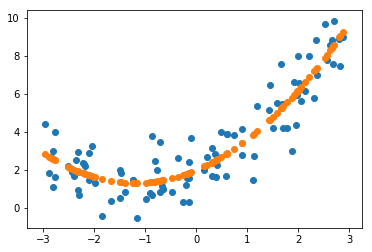

In [27]:
plt.scatter(X,y)
plt.scatter(X,y_predict)
plt.show()

### 关于PolynomialFeatures的degree探讨

In [32]:
X = np.arange(1,11).reshape(-1,2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

### degree = 2

In [40]:
ploy = PolynomialFeatures(degree=2)
ploy.fit(X)
ploy.transform(X)

array([[   1.,    1.,    2.,    1.,    2.,    4.],
       [   1.,    3.,    4.,    9.,   12.,   16.],
       [   1.,    5.,    6.,   25.,   30.,   36.],
       [   1.,    7.,    8.,   49.,   56.,   64.],
       [   1.,    9.,   10.,   81.,   90.,  100.]])

![image.png](http://upload-images.jianshu.io/upload_images/5760375-5a57aa74150dba8a.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


## Pipeline

In [51]:
x = np.random.uniform(-3,3,size =100)
X = x.reshape(-1,1)
y = 0.5 * x **2 + x + 2 +np.random.normal(0,1,size=100)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [53]:
ploy_reg = Pipeline([
    ("ploy",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [54]:
ploy_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('ploy', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [56]:
y_predict = ploy_reg.predict(X)

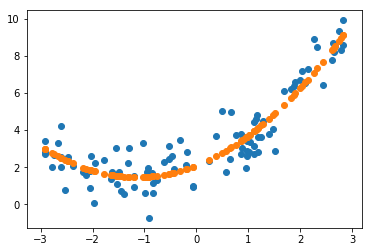

In [57]:
plt.scatter(X,y)
plt.scatter(X,y_predict)
plt.show()